# Final Project

For the final project, your task is to predict the type of galaxies based on some somewhat noisy observations of the galaxies.  Galaxies come in a whole range of "types", but we will simplify down into just 4 types, numbered 1,2,3,4.  (See below for details about what the numbers mean, but you don't really need to understand that for this project.)

The observations of the galaxies come from the Sloan Digital Sky Suvey (SDSS), and include some measurements by the scientists working on that survey based on the images.  At first, we will focus only on the measured values based on the images.  We call this "catalog" data.

The catalog includes a number of measurements and calculations about the images of the galaxies.
These data are fully described in [Fischer et al (2019)](https://arxiv.org/abs/1811.02580), a recent paper by several U. Penn researchers.
Don't worry.  You don't need to read that paper to do this project.  But if you feel inspired to read more about it, please do take a look at the paper.  [This site](https://lco.global/spacebook/galaxies/galaxy-classification/) also has a good student-level disussion of galaxy typing.

The Fischer et al paper describes quite a lot of measurements based on different kinds of fits to the images.  We have extracted a subset of the measurements into a smaller catalog, which should be easier for you to work with.  Specifically, we selected columns related to the bulge + disk decomposition of the galaxy (called SE for Sersic + Exponential in the paper).

The columns in this catalog are:

* id = A numeric ID identifying the galaxy
* gal_type = Which type of galaxy this is.  We discuss this more below.
* ra = Right Ascension in degrees.  Kind of like longitude on the sky.
* dec = Declination in degrees.  Like latitude on the sky.
* redshift = A measure of how far away the galaxy is.
* log_luminosity = Base 10 logarithm of the galaxy's brightness (aka luminosity) measured as a multiple of the sun's luminosity.
* color = Lr / Lg, the ratio of the luminosity at red wavelengths to the luminosity at green wavelengths.
* radius = The half-light radius of the galaxy (called Re in Helena's slides) according to the bulge + disk fit in kiloparsecs (kpc; see below for definition of kpc).
* b_over_a = The ratio of the semi-minor axis of the galaxy (b) to the semi-major axis (a).  b_over_a = 1 is a circle. b_over_a close to 0 is a very elongated ellipse.
* pos_angle = The position angle of the semi-minor axis of the galaxy on the sky in degrees.
* bulge_fract = The fraction of the total light that was found to be in the bulge component (called B/T in Helena's slides).
* sersic_n = The Sersic index of the bulge component of the fit.
* r_bulge = The half-light radius of the bulge component of the fit in kiloparsecs (kpc).
* r_disk = The half-light radius of the disk component of the fit in kiloparsecs (kpc).

Radii are given in kpc above, a common distance unit used by astronomers. For reference, 1 kpc = 1000 pc, and 1 pc = 3.26 light years.

--- 

The gal_type column is your target (Y).  The others you may use as your predictors (X_i).

For the galaxy type, we distilled the morphological classification described in Fischer et al into 4 broad categories.

* gal_type = 1 are elliptical galaxies.  In the paper, these are called E.  They have TTYPE <= 0 and P_S0 <= 0.5.
* gal_type = 2 are lenticular galaxies.  In the paper, these are called S0.  They have TTYPE <= 0 and P_S0 > 0.5.
* gal_type = 3 are tight spiral galaxies.  In the paper, these are described as 0 < TType < 3.  We will call them S1.
* gal_type = 4 are loose spiral galaxies.  In the paper, these are described as TType > 3.  We will call them S2.

### Part 1

Here, you can use any of the various machine-learning classifiers we learned about prior to neural nets (that's part 2).  This could include AdaBoost, RandomForest, LogisticRegression, or even scikit classifiers that we didn't specifically cover in class (e.g. support vector machines).  Anything that can take a set of input training data and learn how to predict an output class.

You can even use binary classifiers if you want, first separating (1,2) from (3,4) and then classifying each of those in a second step.

It should be noted that we don't expect you to be able to do a great job separating the E and S0 galaxies from each other. So don't feel too bad if you aren't getting great results on that part of the classification. However, we think you should be able to do a decent job separating the other types from each other.

**Classifiers tested:**
* Logistic Regression
* LDA
* QDA
* AdaBoost
* Random Forest

Out of all these models, random forest produced the most accurate results. All of them were very computationally efficient.

In [23]:
import pandas as pd

# Read in the catalog data
with open('training_galaxies.dat') as f:
    names = f.readline().rstrip().strip("#").split()
    df = pd.read_csv(f, sep=r'\s+', names=names)
df.info()

# Pull out the target column from the rest.
gal_type = df['gal_type']
df = df.drop('gal_type', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 14 columns):
id                2063 non-null int64
gal_type          2063 non-null int64
ra                2063 non-null float64
dec               2063 non-null float64
redshift          2063 non-null float64
log_luminosity    2063 non-null float64
color             2063 non-null float64
radius            2063 non-null float64
b_over_a          2063 non-null float64
pos_angle         2063 non-null float64
bulge_fract       2063 non-null float64
sersic_n          2063 non-null float64
r_bulge           2063 non-null float64
r_disk            2063 non-null float64
dtypes: float64(12), int64(2)
memory usage: 225.7 KB


In [24]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np

def train_classifier(gal_type, data):
    """Do some kind of training to learn how to predict the galaxy type from the given training data.
    
    Returns the trained classifier.
    """
    
    regr = RandomForestClassifier(criterion='entropy', random_state=1234)
    #regr = AdaBoostClassifier(random_state=1234)
    regr.fit(data, gal_type)
    
    return regr

def classifier_predict(classifier, data):
    """Use the output from the above function to predict the galaxy type for some other validation data.
    
    Returns predictions for the galaxy type of these galaxies.
    """
    
    return classifier.predict(data)

In [25]:
from sklearn.model_selection import train_test_split

# Select half the data for training, half for validation.
# Note: Feel free to change this if you want.  For testing your answer, we will run your code with this full
#       data set as the training data, and different (not provided) data for testing the accuracy.
X_train, X_test, Y_train, Y_test = train_test_split(df, gal_type, test_size = 0.5, random_state=1234)

# Make some kind of classifier and train it
classifier = train_classifier(Y_train, X_train)

# Use it to predict the types for the test galaxies.
Y_pred = classifier_predict(classifier, X_test)

print('Num correct = ',np.sum(Y_pred == Y_test))
print('Num total = ',len(Y_test))
print('Fraction correct = ',np.sum(Y_pred == Y_test) / len(Y_test))
# Note: It may be helpful to construct a confusion matrix to better quantify how well you are doing here, rather
# than just looking at the overal fraction correct.  Feel free to add whatever output you want (including plots)
# to help you better understand your results.

Num correct =  767
Num total =  1032
Fraction correct =  0.7432170542635659


C:\Users\fjfar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=[1, 2, 3, 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


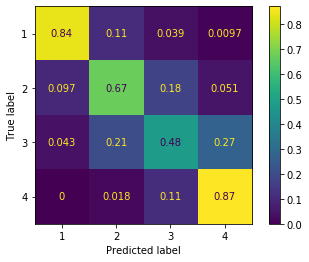

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_conf_matrix(Y_true, Y_pred):
    conf = confusion_matrix(Y_true, Y_pred, labels=[1,2,3,4], normalize='true')
    disp = ConfusionMatrixDisplay(conf, [1,2,3,4])
    disp.plot()
    
plot_conf_matrix(Y_test, Y_pred)

### Part 2

This time, we will still use the catalog information for prediction.  But you should now use some kind of dense neural network as a classifier.  Try different choices of architecture, activation functions, etc.

**Hyperparameters tuned:**
* **Dense Layers and Nodes:** Models with 1 to 4 dense layers were tested, each with 4 to 512 nodes per layer in powers of 2. It was initially found that two dense layers with 4 nodes each performed the best, and fine-tuning around that model revealed that a 6-node layer followed by a 4-node layer produced the best results.
* **Dropout layers:** For more complex models, dropout layers were added to mitigate overfitting. Dropout rates were varied between 0.005 and 0.3, as were the number and positioning of dropout layers. It was found that dropout layers were not as effective at preventing overfitting than just using a simpler architecture. 
* **Learning Rate:** The learning rate was varied between 0.0005 and 0.1. A learning rate of 0.01 seemed to be the best. 
* **ReduceLROnPlateau:** Surprisingly, it was found that the model performed better when ReduceLROnPlateau was not used as a callback function. 
* **Batch size:** Batch sizes between 50 and 100000 were tested. In the end, I chose a similar ratio of batch size to number of datapoints as the final homework and fine tuned from there. A batch size of 150 seemed to work the best. 
* **Number of epochs:** The number of epochs was selected visually based on how long it took the model to converge. More complicated models generally required 300 epochs, whereas this model only seemed to need 200. 
* **Batch normalization:** Various placements of BatchNormalization layers were tested. I found that putting them in every spot possible produced the most accurate results. 
* **Activation functions:** A combination of ReLU, tanh, sigmoid, and softmax acitvation functions were tried. Using ReLU for intermediate dense layers and softmax for the output layer was by far the most desirable, so not too much time was spent playing with activation functions. 

In [35]:

import matplotlib.pyplot as plt
from IPython.display import clear_output
from keras.callbacks import Callback  # Change this to tensorflow.keras if you want.

class PlotLosses(Callback):
    def __init__(self):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        
        clear_output(wait=True)
        fig, axes = plt.subplots(1,2,figsize=(8,3))
        
        axes[0].plot(self.x, self.losses, label="Train loss")
        axes[0].plot(self.x, self.val_losses, label="Validation loss")
        #axes[0].set_yscale('log')
        axes[0].set_xlabel('Number of epochs')
        axes[0].set_ylabel('Losses')
        axes[0].legend()
            
        axes[1].plot(self.x, self.acc, label="Train accuracy")
        axes[1].plot(self.x, self.val_acc, label="Validation accuracy")
        axes[1].set_xlabel('Number of epochs')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show();

In [37]:
# Put whatever keras or tensorflow imports you need here.
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

def train_neural_net(gal_type, data):
    """Do some kind of training to learn how to predict the galaxy type from the given training data.
    
    Returns the trained neural net
    """
    # split data into training and validation
    X_train, X_test, Y_train, Y_test = train_test_split(data, gal_type, test_size = 0.5, random_state=1234)
    Y_train = to_categorical(Y_train-1)
    Y_test = to_categorical(Y_test-1)
    
    
    model = Sequential([BatchNormalization(input_shape=(data.shape[1],)),
                        Dense(6, kernel_regularizer='l2'), BatchNormalization(), Activation('relu'),
                        Dense(4, kernel_regularizer='l2'), BatchNormalization(), Activation('softmax')
                       ])
    
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    plot_losses = PlotLosses()
    model.fit(X_train, Y_train,
           batch_size=150,
           epochs=200,
           validation_data=(X_test, Y_test),
           verbose=1,
           callbacks=[plot_losses],
           )
    
    return model

def neural_net_predict(nn, data):
    """Use the neural net from the above function to predict the galaxy type for some other validation data.
    
    Returns predictions for the galaxy type of these galaxies.
    """
    # get predictions as 5d-array of floats
    result = nn.predict(data)
    # return to single number array
    pred = np.argmax(result, axis=1) + 1

    return pred


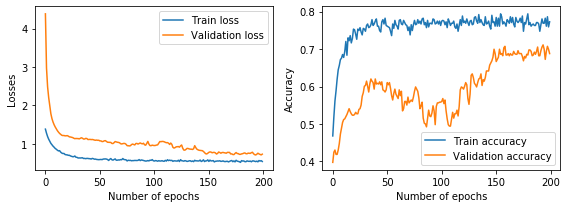

Num correct =  728
Num total =  1032
Fraction correct =  0.7054263565891473


In [38]:
# Select half the data for training, half for validation.
# Note: Feel free to change this if you want.  For testing your answer, we will run your code with this full
#       data set as the training data, and different (not provided) data for testing the accuracy.
X_train, X_test, Y_train, Y_test = train_test_split(df, gal_type, test_size = 0.5, random_state=1234)

# Make some kind of classifier and train it
nn = train_neural_net(Y_train, X_train)

Y_pred = neural_net_predict(nn, X_test)

print('Num correct = ',np.sum(Y_pred == Y_test))
print('Num total = ',len(Y_test))
print('Fraction correct = ',np.sum(Y_pred == Y_test) / len(Y_test))


C:\Users\fjfar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=[1, 2, 3, 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


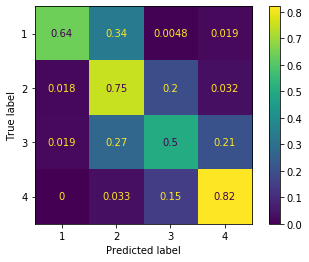

In [39]:
plot_conf_matrix(Y_test, Y_pred)

### Part 3

Finally, for part 3, we will use the original image data observed by the SDSS telescope.

These images are available from the SDSS image cutout server at JHU.  You can get them from there, or we have posted a zip file of the downloaded images on canvas, which you can use instead if you prefer.  

For the classifier, use a convolutional neural net acting on the images.  Play around with different choices of activation, number of layers, etc. to see how well you can get it to work.

Unfortunately, this data set is a little small as given for training a CNN well, but there is a trick we can do to effectively increase the size of the training (and validation) sample.  Galaxies on the sky don't know which way the camera is oriented relative to their features.  So if we rotate the galaxy by an arbitrary angle, it will still be the same type, but the image will look different.  Likewise if we flip the galaxy over.  This means we can add lots of extra images that are rotated and flipped versions of the originals to give the CNN more to work with.

We have provided for you code that can take the original images and randomly rotate them and flip them to produce a larger data set for training the CNN.

**Hyperparameters tuned:**
* **Number of convolutional layers:** Everywhere between 1 and 4 convolutional layers were used. Keeping 2 seemed to work the best. 
* **Kernel size:** Kernel sizes between 2 and 8 were tried for each of the convolutional layers. Having a kernel size of 5x5 on each seemed to be the most accurate. 
* **Number of filters:** Throughout the process I maintained the strategy of doubling the number of filters for each convolutional level. For the first convolutional layer, I tried 8, 10, 16, and 32 filters. 32 performed the best.
* **Average vs Max Pooling:** Different combinations of the number, presence, and type of pooling layers were tried. It seemed that using a Max Pooling layer after the first convolutional layer and an Average Pooling layer after the second convolutional layer produced the most accurate results. 
* **Pooling size:** At each pooling layer, the pooling size was varied between 2 and 10. It was discovered that a pooling size of 5x5 for the first layer and a pooling size of 2x2 for the second layer was the best combination. 
* **Dense Layers and Nodes:** Just like in Part 2, models with 1 to 4 dense layers were tested, each with 4 to 512 nodes per layer in powers of 2. It was found that only a single dense layer with 4 nodes was required to prouce accurate results, and the simplicity of this architecture made it especially desirable. 
* **Dropout layers:** For more complex models, dropout layers were added to mitigate overfitting. Dropout rates were varied between 0.005 and 0.3, as were the number and positioning of dropout layers. It was found that dropout layers were not as effective at preventing overfitting than just using a simpler architecture.
* **Learning Rate:** The learning rate was varied between 0.0005 and 0.02. A learning rate of 0.0007 seemed to be the best.
* **ReduceLROnPlateau:** Once again, I was surprised to discover that leaving out the ReduceLROnPlateau callback produced more accurate results. 
* **Batch size:** Batch sizes of 16, 32, 64, 1000, and 10000 were tested. Unlike Part 2, the batch size seemed to have a minimal effect on the performance of the CNN. Thus, the default batch size of 32 was chosen. 
* **Number of epochs:** Based on the loss and accuracy plots, it seemed this model needed 50 epochs to converge. 
* **Batch normalization:** Almost every possible combination of BatchNormalization layers was tested, both in the convolutional layers and in the dense layers. Surprisingly, batch normaliztion seemed to decrease the quality of the model, except for a single normalization layer at the beginning of the convolutional network.
* **Activation functions:** ReLU and softmax win again.

In [13]:
# The code to download the image is marked off in an `if False` block, so it won't run by default.  
# Switch it to `if True:` to make it run if you want to get the images this way rather than from canvas.
# You can assume the TAs will already have this downloaded when they are running your notebook, 
# so please put it back to `if False` before submitting, if you do switch it.

if False:
    
    import urllib
    import os
    from io import StringIO
    from PIL import Image
    from tqdm.auto import tqdm, trange
 
    def fetch_sdss_image(outfile, RA, DEC, scale=1., width=32, height=32):
        """Fetch the image at the given RA, DEC from the SDSS server"""
        url = ("http://skyservice.pha.jhu.edu/DR8/ImgCutout/getjpeg.aspx?ra=%.8f&dec=%.8f&scale=%.2f&width=%i&height=%i" % (RA, DEC, scale, width, height))
        im = Image.open(urllib.request.urlopen(url))
        d = os.path.dirname(outfile)
        if d != '' and not os.path.exists(d):
            os.makedirs(d)
        im.save(outfile)

    for i in trange(len(df)):
        fetch_sdss_image('images/{}/{}.jpg'.format(gal_type[i], df['id'][i]), df['ra'][i], df['dec'][i])

In [14]:
# This is the code that takes the input images and rotates/flips them to produce new images.
# The one thing you might want to play with here, is the validation_split parameter.

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True, vertical_flip=True, validation_split=0.3, rotation_range=360.)

train_generator = train_datagen.flow_from_directory(
    directory='images',
    class_mode='categorical',
    batch_size=32,
    target_size=(32, 32),
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    directory='images',
    class_mode='categorical',
    batch_size=32,
    target_size=(32, 32),
    subset='validation'
)

Found 1447 images belonging to 4 classes.
Found 616 images belonging to 4 classes.


In [40]:
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

def train_cnn(train_generator, val_generator):
    """Do some kind of training to learn how to predict the galaxy type from the given training images.
    
    Returns the trained convolutional neural net
    """
    # Hint: With the generators, the fit call should look like
    #       cnn.fit(train_generator, validation_data=val_generator, ...)
    #       The generators already have the gal_type information encoded into the directory names.
    #       (images/1/*, images/2/*, etc.)  So you don't need to also include the gal_type anywhere.
    
    x = Input(shape=(32,32,3))
    
    h = BatchNormalization()(x)
    h = Conv2D(32, (5,5), padding='same', activation='relu')(h)
    h = MaxPooling2D((5,5))(h)
    h = Conv2D(64, (5,5), padding='same', activation='relu')(h)
    h = AveragePooling2D((2,2))(h)
    
    h = Flatten()(h)
    
    #h = Dense(4, kernel_regularizer='l2')(h)
    #h = Activation('relu')(h)
    
    h = Dense(4, kernel_regularizer='l2')(h)
    
    y = Activation('softmax')(h)
    
    model = Model(x,y)
    
    plot_losses = PlotLosses()
    
    model.compile(optimizer=Adam(learning_rate=0.0007), loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.summary()
    
    model.fit(train_generator, 
              validation_data=val_generator,
              epochs=50, 
              callbacks=[plot_losses])
    
    return model

def cnn_predict(cnn, images):
    """Use the convolutional neural net from the above function to predict the galaxy type for some validation images.
    
    Returns predictions for the galaxy type of these galaxies.
    """
    images /= 255.
    result = cnn.predict(images)
    pred = np.argmax(result, axis=1) + 1
    return pred



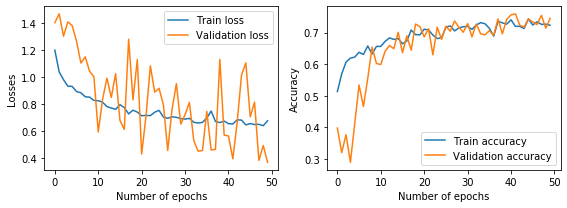

Num correct =  792
Num total =  1032
Fraction correct =  0.7674418604651163


In [41]:
from keras.preprocessing.image import load_img, img_to_array

# In this case, the image generators will generate random flips of all our input images, so we will actually
# use all the input images for training the CNN.  However, to be at least a little consistent with the
# previous parts, we still split the data, and we'll use just half the images for testing.
X_train, X_test, Y_train, Y_test = train_test_split(df, gal_type, test_size = 0.5, random_state=1234)

# Make some kind of classifier and train it
cnn = train_cnn(train_generator, val_generator)

test_images = np.array([img_to_array(load_img('images/{}/{}.jpg'.format(gt, ID), target_size=(32,32))) 
                        for gt,ID in zip(Y_test, X_test['id'])])

Y_pred = cnn_predict(cnn, test_images)

print('Num correct = ',np.sum(Y_pred == Y_test))
print('Num total = ',len(Y_test))
print('Fraction correct = ',np.sum(Y_pred == Y_test) / len(Y_test))


C:\Users\fjfar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass display_labels=[1, 2, 3, 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


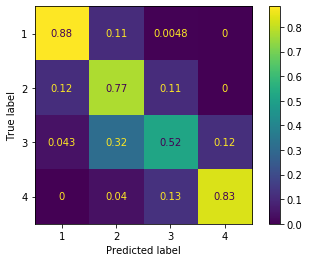

In [43]:
plot_conf_matrix(Y_test, Y_pred)